### Tokenizers
[doc source](https://huggingface.co/learn/nlp-course/chapter2/4?fw=pt)

<img src='./images/huggingface_tokenizers.png' width=800 height=400>


* **type of tokenizers**
<img src='./images/huggingface_type_of_tokenizers.png' width=800 height=400>

### 1. Word based tokenization
* splitting the raw text into words
* very high in in vocabulary size

In [2]:
# sentence = Let's do tokenization!
# split on spaces
# let's      do     tokenization!
# split on punctuation
# Let      's       do       tokenization      !

### 2. Character-based tokenization
* split on characters
* low in vocabulary size

* compare between word-based vs character-based
<img src="./images/huggingface_compare_tokenization.png" width=800 height=400>

### 3. Subword-based tokenization
* splitting a raw text into subwords
* subword-based tokenization lies between character and word based algorithms

* frequently used words should not be split into smaller subwords.
* Rare words should be decomposed into meaningful subwords.

<img src="./images/huggingface_subword_based_tokenization.png" width=800 height=400>  

* rare words should be decomposed into meaningful subwords.
* subwords helps identify similar syntactic or semantic situations in text.
  
<img src="./images/huggingface_subword_tokenization_rare_word.png" width=800 height=400>

<img src="./images/huggingface_subword_tokenization_ll.png" width=800 height=400>

<!-- 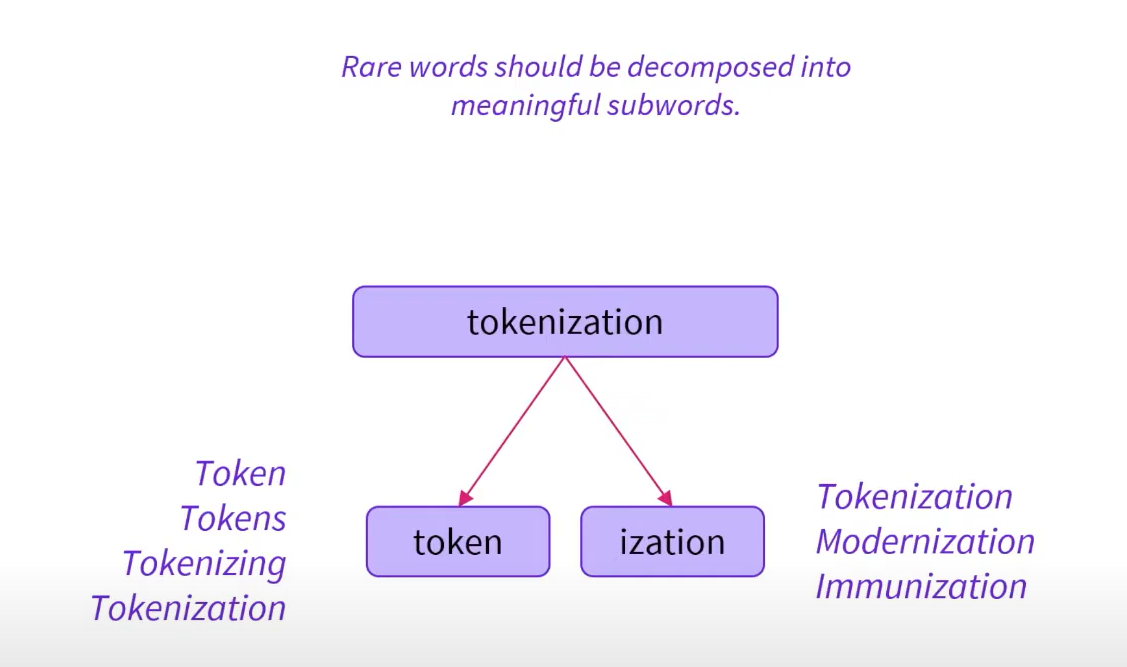 -->
* subword tokenization algorithms can identify start of word tokens.
<img src= './images/huggingface_subword_lll.png' width=800 height=400>
* Most models obtaining the start-of-the-art results in english today use some kind of subword-tokenization algorithm.
<img src="./images/huggingface_subword_model_vs_tokenizers.png" width=800 height=400>

### Tokenization pipeline
<img src='./images/huggingface_inside_tokenizer_object.png' width=800 height=400>

In [4]:
from transformers import AutoTokenizer

In [8]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
inputs = tokenizer("let's try to tokenize!")
print(inputs)

{'input_ids': [101, 2292, 1005, 1055, 3046, 2000, 19204, 4697, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [9]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
inputs = tokenizer.tokenize("let's try to tokenize!")
print(inputs)

['let', "'", 's', 'try', 'to', 'token', '##ize', '!']


In [10]:
tokenizer = AutoTokenizer.from_pretrained('albert-base-v1')
tokens = tokenizer.tokenize("let's try to tokenize!")
print(tokens)

['▁let', "'", 's', '▁try', '▁to', '▁to', 'ken', 'ize', '!']


In [11]:
from transformers import AutoTokenizer

In [14]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
tokens = tokenizer.tokenize("let's try to tokenize!")
input_ids = tokenizer.convert_tokens_to_ids(tokens)
print(input_ids)

[2292, 1005, 1055, 3046, 2000, 19204, 4697, 999]


In [16]:
# Lastly tokenizer adds special tokens the model expects.
# "[CLS] let's try to tokenize! [SEP]"
final_inputs = tokenizer.prepare_for_model(input_ids)
print(final_inputs)
# warning: You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, 
#using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.

{'input_ids': [101, 2292, 1005, 1055, 3046, 2000, 19204, 4697, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [18]:
print(tokenizer.decode(final_inputs['input_ids']))

[CLS] let's try to tokenize! [SEP]


In [20]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('roberta-base')
inputs = tokenizer("Let's try to tokenize!")
print(tokenizer.decode(inputs['input_ids']))

<s>Let's try to tokenize!</s>
